In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

In [ ]:
# Load housing.csv and display the data head
df = pd.read_csv('/content/miami-housing.csv')
df.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


In [ ]:
# The dataset contains the following columns:
# LATITUDE
# LONGITUDE
# PARCELNO: unique identifier for each property. About 1% appear multiple times.
# SALE_PRC: sale price ($)
# LND_SQFOOT: land area (square feet)
# TOTLVGAREA: floor area (square feet)
# SPECFEATVAL: value of special features (e.g., swimming pools) ($)
# RAIL_DIST: distance to the nearest rail line (an indicator of noise) (feet)
# OCEAN_DIST: distance to the ocean (feet)
# WATER_DIST: distance to the nearest body of water (feet)
# CNTR_DIST: distance to the Miami central business district (feet)
# SUBCNTR_DI: distance to the nearest subcenter (feet)
# HWY_DIST: distance to the nearest highway (an indicator of noise) (feet)
# age: age of the structure
# avno60plus: dummy variable for airplane noise exceeding an acceptable level
# structure_quality: quality of the structure
# month_sold: sale month in 2016 (1 = jan)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   PARCELNO           13932 non-null  int64  
 3   SALE_PRC           13932 non-null  float64
 4   LND_SQFOOT         13932 non-null  int64  
 5   TOT_LVG_AREA       13932 non-null  int64  
 6   SPEC_FEAT_VAL      13932 non-null  int64  
 7   RAIL_DIST          13932 non-null  float64
 8   OCEAN_DIST         13932 non-null  float64
 9   WATER_DIST         13932 non-null  float64
 10  CNTR_DIST          13932 non-null  float64
 11  SUBCNTR_DI         13932 non-null  float64
 12  HWY_DIST           13932 non-null  float64
 13  age                13932 non-null  int64  
 14  avno60plus         13932 non-null  int64  
 15  month_sold         13932 non-null  int64  
 16  structure_quality  139

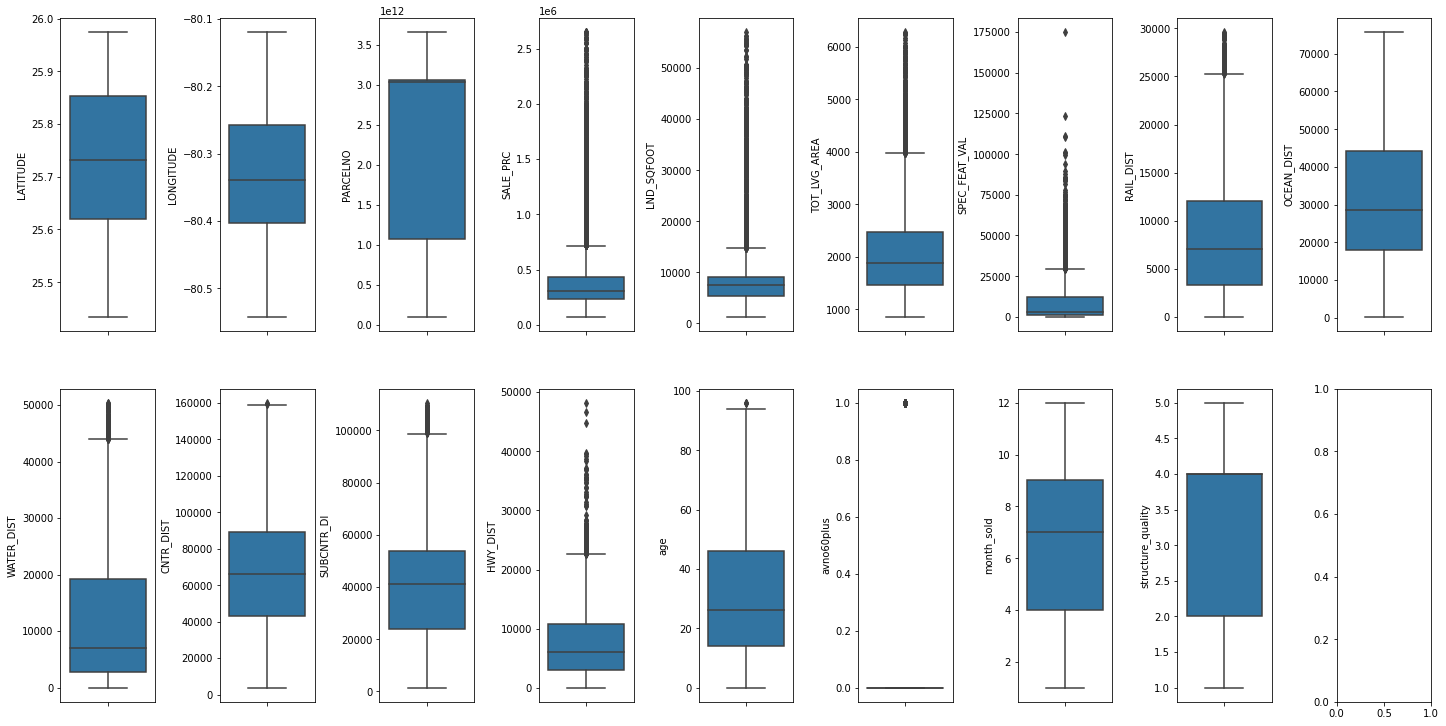

In [ ]:
# Data Pre-processing
# Check outliers in each column
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=9, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
# Let's look at the outlier percentages of each column.
for k, v in df.items():
      q1 = v.quantile(0.25)
      q3 = v.quantile(0.75)
      irq = q3 - q1
      v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
      perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
      print("Column %s outliers = %.2f%%" % (k, perc))

Column LATITUDE outliers = 0.00%
Column LONGITUDE outliers = 0.00%
Column PARCELNO outliers = 0.00%
Column SALE_PRC outliers = 9.62%
Column LND_SQFOOT outliers = 9.83%
Column TOT_LVG_AREA outliers = 3.21%
Column SPEC_FEAT_VAL outliers = 12.22%
Column RAIL_DIST outliers = 0.98%
Column OCEAN_DIST outliers = 0.00%
Column WATER_DIST outliers = 1.76%
Column CNTR_DIST outliers = 0.02%
Column SUBCNTR_DI outliers = 0.86%
Column HWY_DIST outliers = 2.09%
Column age outliers = 0.03%
Column avno60plus outliers = 100.00%
Column month_sold outliers = 0.00%
Column structure_quality outliers = 0.00%


In [ ]:
# Remove outliers
# Let's remove rows that have outlier in any column. 
# The definition for outlier is 3 standard deviations away from the mean,
import numpy as np
from scipy import stats
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [ ]:
# Check the shape of data #13932
np.shape(df)

(12840, 17)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

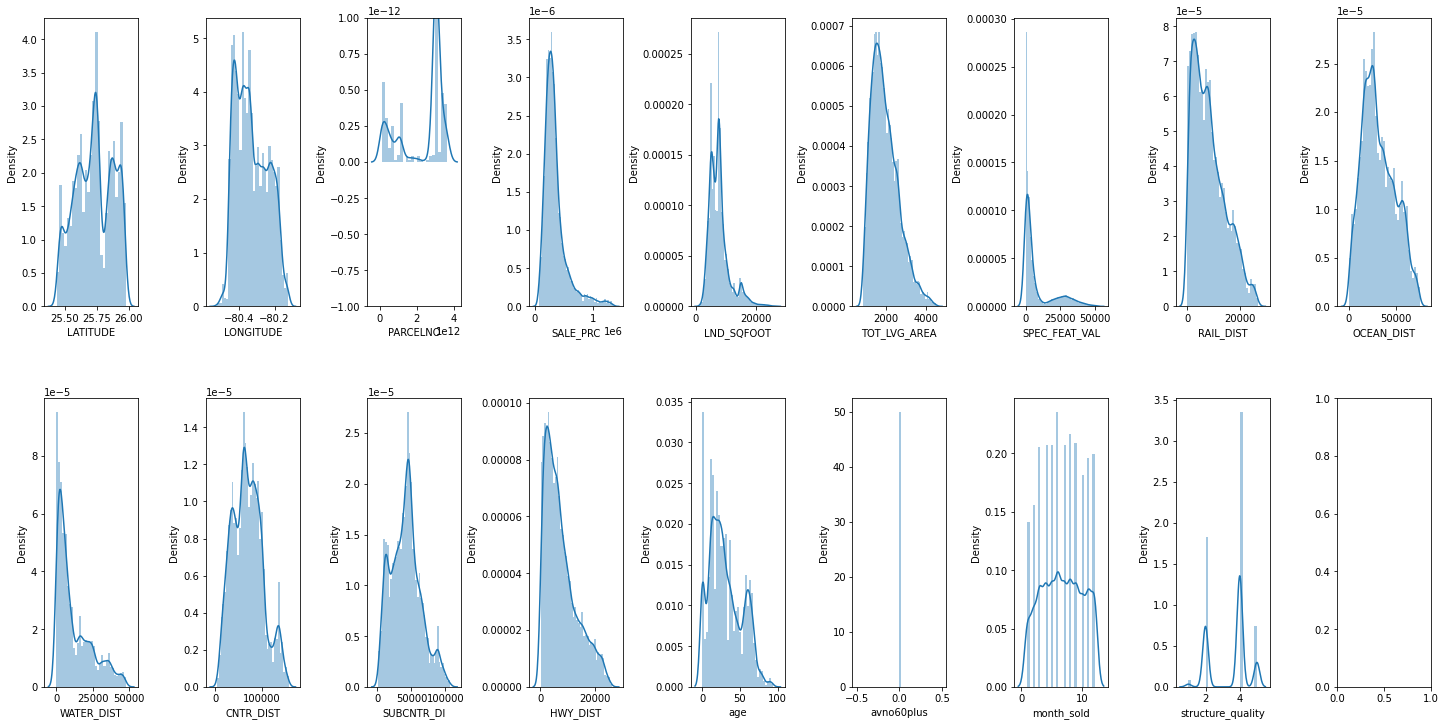

In [ ]:
# Plot distribution of each column
fig, axs = plt.subplots(ncols=9, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
# Remove skewness of the data through log transformation 
for col in df.columns:
    if np.abs(df[col].skew()) > 0.3:
        df[col] = np.log1p(df[col])

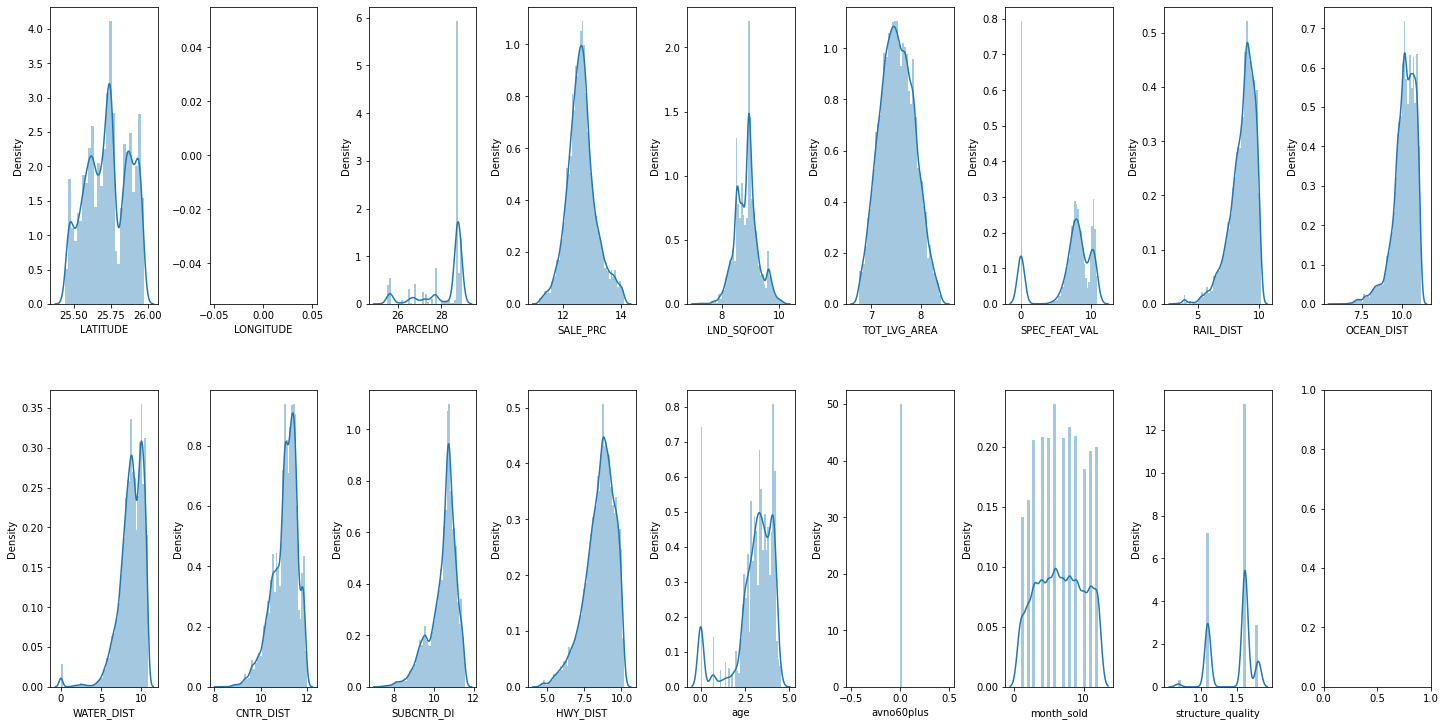

In [ ]:
# Distribution AFTER removing skewness
fig, axs = plt.subplots(ncols=9, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

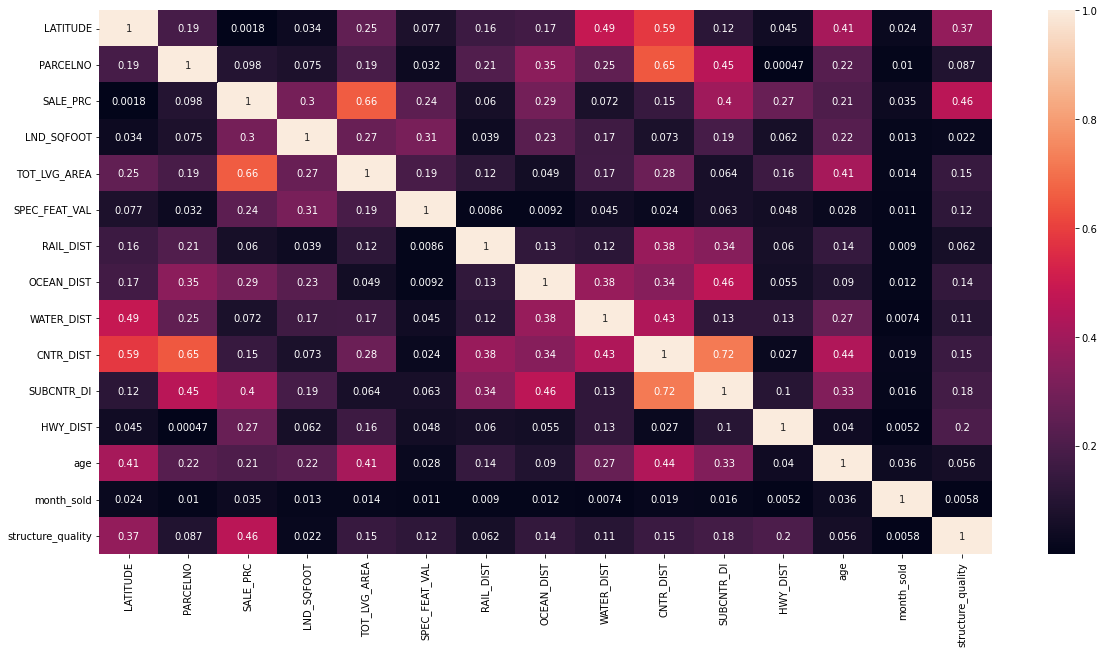

In [ ]:
# Correlation Analysis
# Create heatmap to see which features are correlated

df_col = df[['LATITUDE', 'PARCELNO', 'SALE_PRC', 'LND_SQFOOT',
               'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'RAIL_DIST', 'OCEAN_DIST',
               'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST', 'age', 'month_sold', 'structure_quality']]
plt.figure(figsize=(20, 10))
sns.heatmap(df_col.corr().abs(),  annot=True)


0.66 - tot_lvg_area : floor area (square feet)

0.46 - structure_quality : quality of the structure

0.4 - SUBCENTR_DI : distance to the nearest subcenter (feet)

0.3 - LND_SQFOOT : land area (square feet)

we will use these four features to predict SALE_PRC

Below are features with very weak correlations

0.24 - spec_feat_val : value of special features (e.g., swimming pools) ($)

0.29 0 ocean_dist: distance to the ocean (feet)

0.27 - hwy_dist :  distance to the nearest highway (an indicator of noise) (feet)

0.21 - age : age of the structure


In [ ]:
df.columns

Index(['LATITUDE', 'LONGITUDE', 'PARCELNO', 'SALE_PRC', 'LND_SQFOOT',
       'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'RAIL_DIST', 'OCEAN_DIST',
       'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST', 'age',
       'avno60plus', 'month_sold', 'structure_quality'],
      dtype='object')

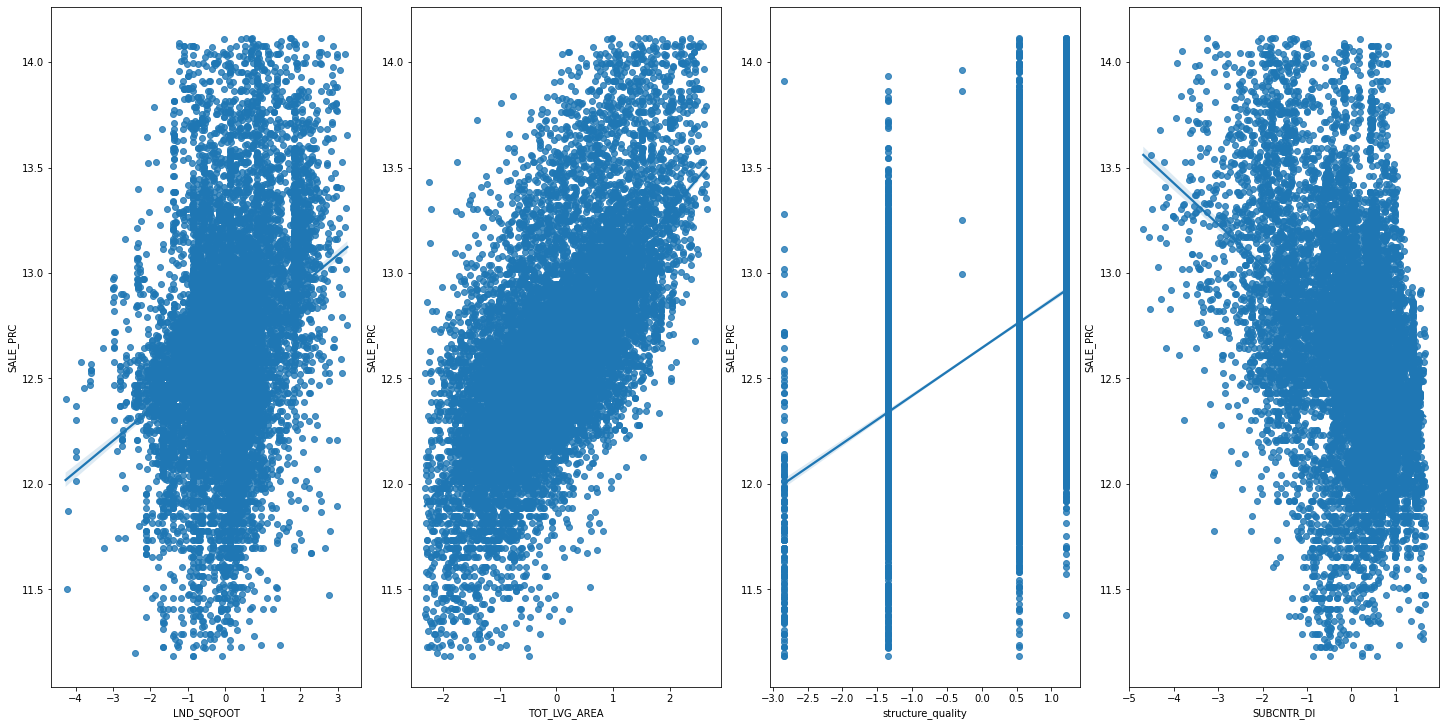

In [ ]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against sale price
standard_scaler = preprocessing.StandardScaler()
column_sels = ['LND_SQFOOT','TOT_LVG_AREA','structure_quality','SUBCNTR_DI']
x = df.loc[:,column_sels]
y = df['SALE_PRC']
x = pd.DataFrame(data=standard_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Modeling

In [ ]:
# Define x and y

column_sels = ['LND_SQFOOT','TOT_LVG_AREA','structure_quality','SUBCNTR_DI']
x = df.loc[:,column_sels]
y = df['SALE_PRC']

# Normalize using standardscaler
standard_scaler = preprocessing.StandardScaler()
x_scaled = standard_scaler.fit_transform(x)

In [ ]:
# Split into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2)

In [ ]:
# 1. Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
l_regression = LinearRegression()
l_regression.fit(x_train, y_train)
y_pred = l_regression.predict(x_test)
print('mean_squared_error : ', mean_squared_error(y_test, y_pred))
print('r2_score : ', r2_score(y_test, y_pred))

mean_squared_error :  0.06799794401689012
r2_score :  0.7010410693167615


In [ ]:
# Coefficients:  LND_SQFOOT','TOT_LVG_AREA','structure_quality','SUBCNTR_DI
l_regression.coef_

array([ 0.03540497,  0.30290065,  0.15076193, -0.17964823])

In [ ]:
# TOT_LVG_AREA strongest correlation
# SUBCENTR_DI second
# Strcuture_quality
# LND_SQFOOT

Text(0.5, 1.0, 'Actual vs, Predicted')

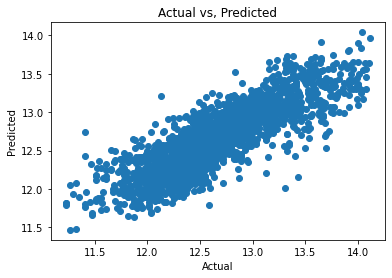

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs, Predicted')

In [ ]:
# 2. Knn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

Minimum error: 0.05481938058485681 at K = 13


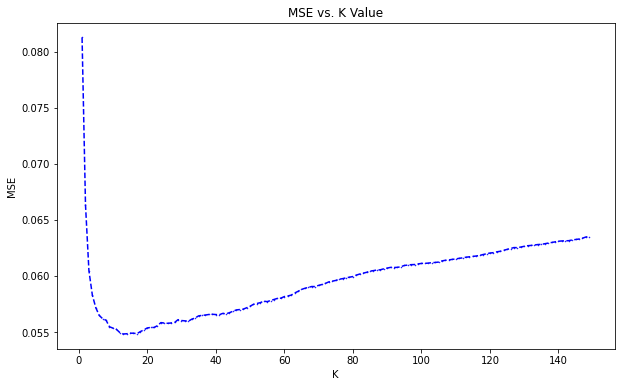

In [ ]:
# Optimize k 
error_rate = []
for i in range(1,150):
 knn = KNeighborsRegressor(n_neighbors=i)
 knn.fit(x_train,y_train)
 y_pred = knn.predict(x_test)
 error_rate.append(mean_squared_error(y_test, y_pred))

plt.figure(figsize=(10,6))
plt.plot(range(1,150),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=0.5)
plt.title('MSE vs. K Value')
plt.xlabel('K')
plt.ylabel('MSE')
print("Minimum error:",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [ ]:
knn = KNeighborsRegressor(n_neighbors=13)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('mean_squared_error : ', mean_squared_error(y_test, y_pred))
print('r2_score : ', r2_score(y_test, y_pred))

mean_squared_error :  0.05481938058485681
r2_score :  0.7589817804447815


In [ ]:
# 3. Random Forest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(oob_score=True)
# Tune the hyperparameters like n_estimator
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)
print('mean_squared_error : ', mean_squared_error(y_test, y_pred))
print('r2_score : ', r2_score(y_test, y_pred))

mean_squared_error :  0.05007523165836311
r2_score :  0.7798398477080254


In [ ]:
rfr.oob_score_

0.7907081651719563

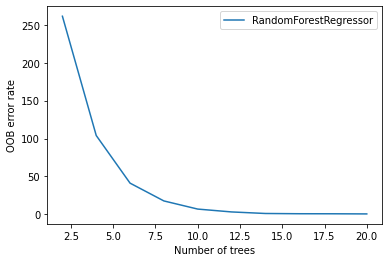

In [ ]:
from collections import OrderedDict
ensemble_clfs = [
    (
        "RandomForestRegressor",
        RandomForestRegressor(
            warm_start=True,
            oob_score=True,
        ),
    ),
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 2
max_estimators = 20

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators+1 , 2):
        #print(i)
        clf.set_params(n_estimators=i)
        clf.fit(x_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        #print(oob_error)
        error_rate[label].append((i, oob_error))
        

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

#plt.xlim(0, 22)
#plt.xticks(np.arange(2,22,2), np.arange(2,22,2))
plt.xlabel("Number of trees")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()


In [ ]:
# The error changes minimally starting from n=10

rfr = RandomForestRegressor(n_estimators=10, oob_score=True)
# Tune the hyperparameters like n_estimator
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)
print('mean_squared_error : ', mean_squared_error(y_test, y_pred))
print('r2_score : ', r2_score(y_test, y_pred))

mean_squared_error :  0.0549340621252326
r2_score :  0.7584775729841656


In [ ]:
# Feature importance # order: LND_SQFOOT','TOT_LVG_AREA','structure_quality','SUBCNTR_DI
# maybe include more features
rfr.feature_importances_

array([0.1102806 , 0.44630819, 0.20861404, 0.23479717])

In [ ]:
# Order
# TOT_LVG_AREA
# SUBCNTR_DI
# structure_quality 
# LND_SQFOOT

In [ ]:
# 4. Neural Network 
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
regr = MLPRegressor().fit(x_train, y_train)
y_pred = regr.predict(x_test)
print('mean_squared_error : ', mean_squared_error(y_test, y_pred))
print('r2_score : ', r2_score(y_test, y_pred))

mean_squared_error :  0.05901482727004595
r2_score :  0.7405361307582096


In [ ]:
regr.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [ ]:
# Try other values to tune hyperparameters in MLPRegressor
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
# cv=3 reduces running time
# don't run this (it takes like an hour to run)
grid = GridSearchCV(regr, parameter_space, n_jobs=-1, cv=10, scoring='neg_mean_squared_error')
grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             scoring='neg_mean_squared_error')

In [ ]:
grid.best_estimator_

MLPRegressor(alpha=0.05, learning_rate='adaptive')

In [ ]:
grid.best_params_

{'activation': 'relu',
 'alpha': 0.05,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'adaptive',
 'solver': 'adam'}

In [ ]:
# Apply the tuned parameters
regr = MLPRegressor(alpha=0.05, learning_rate='adaptive').fit(x_train, y_train)
y_pred = regr.predict(x_test)
print('mean_squared_error : ', mean_squared_error(y_test, y_pred))
print('r2_score : ', r2_score(y_test, y_pred))

mean_squared_error :  0.0588681058252563
r2_score :  0.7411812044714929


[70.65633904746336, 53.67366426557726, 35.67315785077924, 19.23032043196752, 8.506687702227383, 4.003847622113891, 2.701047925180691, 2.265748783795562, 1.9809169869078576, 1.7306596829113483, 1.5058379524761245, 1.3080418089985848, 1.1311390572898243, 0.975282592078807, 0.839565121916619, 0.7209276386204301, 0.6166432062106668, 0.5265352139342226, 0.44803763842632766, 0.3796984806561386, 0.3214124163531042, 0.27347531886171644, 0.234155924680925, 0.2022469751020245, 0.17697604420359087, 0.156122415305966, 0.1393669322504376, 0.1254751013270349, 0.11413294372130271, 0.10431530996825332, 0.0961304942822045, 0.08936344953788977, 0.08341423899715775, 0.07852034169676499, 0.07448356413327441, 0.0705777458593053, 0.06781658172598513, 0.06509202250329389, 0.062456412381828495, 0.06037042471746708, 0.058528877065757934, 0.05676119734808379, 0.05516806301671562, 0.05370690626589788, 0.052566786347175494, 0.0513837134197191, 0.05039909570282019, 0.04916173586729114, 0.04830158992406387, 0.04745

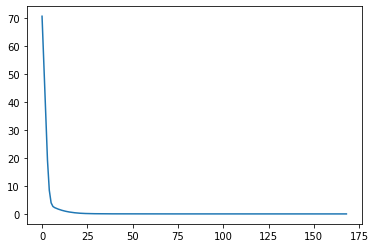

In [ ]:
# Compare training vs test error
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
print(regr.loss_curve_)
plt.plot(regr.loss_curve_) # loss

In [ ]:
# Check scores for test and training data
print(regr.score(x_train, y_train))
print(regr.score(x_test, y_test))

0.7790641619322946
0.7506163736117581
